# Image Classification

- CIFAR 10 Dataset (In-built)

#### CIFAR-10 consists of 60,000 32x32 color images in 10 different classes, with each class containing 6,000 images. 
These images are divided into a training set of 50,000 images and a test set of 10,000 images.

The 10 classes in the CIFAR-10 dataset are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck


### Step 1: Import necessary libraries

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load and preprocess the CIFAR-10 dataset

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

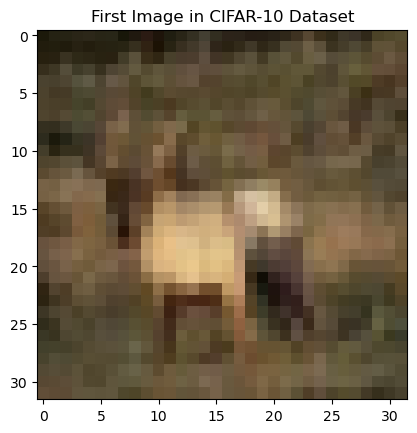

In [3]:
# Visualize the first image from the training set
plt.imshow(train_images[3])
plt.title("First Image in CIFAR-10 Dataset")
plt.show()


In [5]:
# Normalize pixel values to a range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Step 3: Create a deep learning model

In [6]:
# Create a deep learning model
model = models.Sequential([
    # Step 4: Convolutional Layers
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Step 5: Flatten the output
    layers.Flatten(),

    # Step 6: Fully Connected Layers
    layers.Dense(64, activation='softmax'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

### Step 4: Compile the model

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# model.summary()

### Step 5: Train the model

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.1990 - loss: 2.1444 - val_accuracy: 0.2812 - val_loss: 1.8880
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.3030 - loss: 1.8420 - val_accuracy: 0.3721 - val_loss: 1.6791
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.3921 - loss: 1.6087 - val_accuracy: 0.5002 - val_loss: 1.4319
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5173 - loss: 1.3633 - val_accuracy: 0.5303 - val_loss: 1.2813
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5605 - loss: 1.2010 - val_accuracy: 0.5494 - val_loss: 1.2086


In [10]:
# Create a deep learning model with more layers and techniques for better accuracy
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Normalizes output of previous layer
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters
    layers.BatchNormalization(),
    
    # Convolutional Layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),  # Increased number of neurons
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output Layer
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))  # Increased epochs for better training


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.3729 - loss: 1.8064 - val_accuracy: 0.4232 - val_loss: 1.7645
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5887 - loss: 1.1712 - val_accuracy: 0.5980 - val_loss: 1.1305
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6671 - loss: 0.9689 - val_accuracy: 0.6755 - val_loss: 0.9176
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7104 - loss: 0.8426 - val_accuracy: 0.6793 - val_loss: 0.9243
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7392 - loss: 0.7587 - val_accuracy: 0.6557 - val_loss: 1.0003


In [11]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Create a deep learning model with more layers and techniques for better accuracy
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Normalizes output of previous layer
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout layer after first convolutional block
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout layer after second convolutional block
    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters
    layers.BatchNormalization(),
    
    # Convolutional Layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),  # Increased number of neurons
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output Layer
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=5,          # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best validation loss

# Train the model with early stopping
history = model.fit(train_images, train_labels,
                    epochs=10,  # You can set this higher since early stopping will stop training
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])  # Add the early stopping callback


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.3400 - loss: 1.8946 - val_accuracy: 0.5185 - val_loss: 1.3857
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.5397 - loss: 1.2997 - val_accuracy: 0.5396 - val_loss: 1.2738
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6132 - loss: 1.1196 - val_accuracy: 0.6090 - val_loss: 1.1021
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6487 - loss: 1.0089 - val_accuracy: 0.5791 - val_loss: 1.2919
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6792 - loss: 0.9336 - val_accuracy: 0.6037 - val_loss: 1.2615
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6996 - loss: 0.8831 - val_accuracy: 0.7073 - val_loss: 0.8421
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7190 - loss: 0.8164 - val_accuracy: 0.6936 - val_loss: 0.8925
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7309 -

### Step 6: Evaluate the model

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7643 - loss: 0.7121
Test accuracy: 0.7578999996185303


### Step 7: Visualize training history

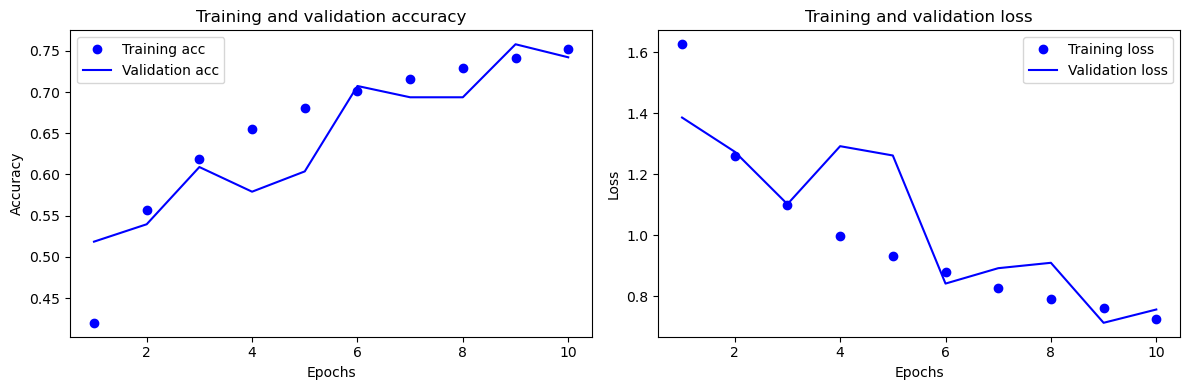

In [13]:
# Visualize training history
def plot_training_history(history):
    # Extract training history metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create plots for accuracy and loss
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

### Step 8: Visualize example predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


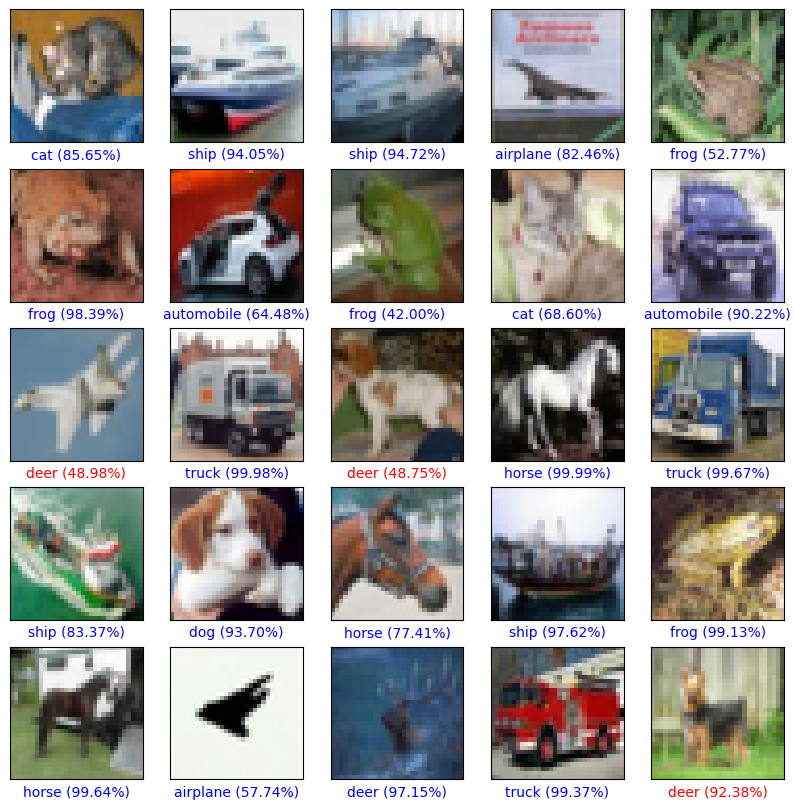

In [15]:
# Visualize example predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_example_predictions():
    # Get predictions and convert logits to probabilities
    predictions = model.predict(test_images)
    predictions = tf.nn.softmax(predictions).numpy()  # Apply softmax to convert logits to probabilities

    num_rows, num_cols = 5, 5
    plt.figure(figsize=(10, 10))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(test_labels[i])
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions[i]):.2f}%)", color=color)

# Call the function to plot example predictions
plot_example_predictions()
